In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import matplotlib.font_manager as font_manager

font_path = '/kaggle/input/arvo-fonts/Arvo-Bold.ttf'
font_props = font_manager.FontProperties(fname=font_path)


In [51]:
mls_df = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_clean.csv")
ptfc_player = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_players_clean.csv")
mls_df = mls_df[mls_df['league_name'] == 'Major League Soccer']
ptfc_player = ptfc_player[ptfc_player['team_name'] == 'Portland Timbers']
mls_df.shape # 5226 games, 39 columns
ptfc_player.shape


# Extract only Timbers games from the data
timbers_home = mls_df["teams_home_name"] == "Portland Timbers"
timbers_away = mls_df["teams_away_name"] == "Portland Timbers"
timbers_any = timbers_home | timbers_away
timbersdf = mls_df[timbers_any]
print(timbersdf[['teams_home_name','teams_away_name','league_season']].head(5)) # display matchups
print(timbersdf[['teams_home_name','teams_away_name','league_season']].tail(5)) # display matchups
timbersdf.shape # 455 games, 39 data columns
timbersdf.columns

<ipython-input-51-19e6963f828e>:1: DtypeWarning: Columns (24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  mls_df = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_clean.csv")


          teams_home_name   teams_away_name  league_season
228   Vancouver Whitecaps  Portland Timbers           2024
290        St. Louis City  Portland Timbers           2024
420    Philadelphia Union  Portland Timbers           2013
447            Toronto FC  Portland Timbers           2012
1330         Nashville SC  Portland Timbers           2022
        teams_home_name      teams_away_name  league_season
44474   Orlando City SC     Portland Timbers           2016
46909  Portland Timbers       Real Salt Lake           2019
46911  Portland Timbers  Vancouver Whitecaps           2019
48122  Portland Timbers      Orlando City SC           2020
48130  Portland Timbers       Houston Dynamo           2020


Index(['fixture_id', 'fixture_date', 'fixture_timezone', 'fixture_timestamp',
       'fixture_periods_first', 'fixture_periods_second', 'fixture_referee',
       'fixture_venue_id', 'fixture_venue_name', 'fixture_venue_city',
       'fixture_status_long', 'fixture_status_short', 'fixture_status_elapsed',
       'fixture_status_extra', 'league_id', 'league_name', 'league_country',
       'league_logo', 'league_flag', 'league_season', 'league_round',
       'teams_home_id', 'teams_home_name', 'teams_home_logo',
       'teams_home_winner', 'teams_away_id', 'teams_away_name',
       'teams_away_logo', 'teams_away_winner', 'goals_home', 'goals_away',
       'score_halftime_home', 'score_halftime_away', 'score_fulltime_home',
       'score_fulltime_away', 'score_extratime_home', 'score_extratime_away',
       'score_penalty_home', 'score_penalty_away'],
      dtype='object')

In [52]:
timbersdf['timbers_win'] = timbersdf['teams_home_winner']
timbersdf['timbers_win'] = timbersdf['teams_home_winner'].where(
    timbersdf['teams_away_name'] != "Portland Timbers",  # Keep home win unless Timbers was away
    timbersdf['teams_away_winner']  # Replace with away win when Timbers was away
)
timbersdf['timbers_win'] = timbersdf['timbers_win'].fillna(0)
timbersdf['timbers_win'] = timbersdf['timbers_win'].astype(int)

ptfc_byseason = timbersdf.groupby('league_season', as_index=True).sum() # League season is now index (row) identifier


<ipython-input-52-66c2cb889e4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timbersdf['timbers_win'] = timbersdf['teams_home_winner']
<ipython-input-52-66c2cb889e4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timbersdf['timbers_win'] = timbersdf['teams_home_winner'].where(
<ipython-input-52-66c2cb889e4e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

<ipython-input-53-6e00299d2c5a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(season, rotation=90, ha="center")


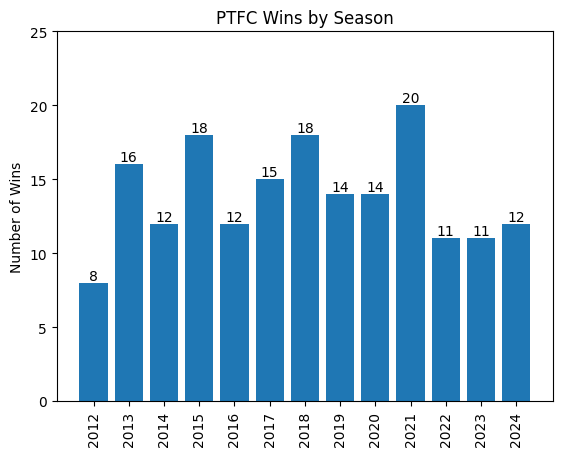

In [53]:
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()

season = ptfc_byseason.index.astype(int).astype(str)
# Convert the league season to strings properly
bar_container = ax.bar(season, ptfc_byseason['timbers_win'])

# Set axis labels and title
ax.set(ylabel='Number of Wins', title='PTFC Wins by Season', ylim=(0, 25))

ax.set_xticklabels(season, rotation=90, ha="center")

# Add bar labels
ax.bar_label(bar_container)

# Show plot
plt.show()


#ptfc_player = ptfc_player.groupby("player_name").sum(numeric_only = True)
# print(ptfc_player.columns)
# ptfc_player = ptfc_player.groupby("player_name").sum(numeric_only = True)
# ptfc_player[['goals_total']].sort_values('goals_total',ascending=False).head(10)

In [54]:
season = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_clean.csv")

<ipython-input-54-917d1254ba6f>:1: DtypeWarning: Columns (24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  season = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_clean.csv")


In [55]:
season = season[['fixture_id','league_season']]
ptfc_player = ptfc_player.merge(season,left_on = ['fixture_id'],right_on = ['fixture_id'])

,fixture_id,team_id,team_name,team_logo,update,player_id,player_name,position,game_minutes,game_number,...,fouls_drawn,fouls_committed,yellow_cards,red_cards,penalty_won,penalty_committed,penalty_scored,penalty_missed,penalty_saved,league_season
127,148575,1617,Portland Timbers,https://media.api-sports.io/football/teams/161...,2020-05-12 21:35:11 UTC,105372,Jake Gleeson,G,90.0,90.0,...,0,1,0,0,0,0,0,0,0,2016
128,147570,1617,Portland Timbers,https://media.api-sports.io/football/teams/161...,2020-05-12 21:30:17 UTC,105372,Jake Gleeson,G,90.0,90.0,...,0,0,0,0,0,0,0,0,0,2018
129,148395,1617,Portland Timbers,https://media.api-sports.io/football/teams/161...,2020-05-12 21:32:38 UTC,105372,Jake Gleeson,G,90.0,90.0,...,0,0,0,0,0,0,0,0,0,2016
130,148050,1617,Portland Timbers,https://media.api-sports.io/football/teams/161...,2020-05-12 21:32:22 UTC,105372,Jake Gleeson,G,90.0,90.0,...,0,0,0,0,0,0,0,0,0,2017
731,148162,1617,Portland Timbers,https://media.api-sports.io/football/teams/161...,2020-05-12 21:33:58 UTC,105372,Jake Gleeson,G,90.0,90.0,...,1,0,0,0,0,0,0,0,0,2017
732,148604,1617,Portland Timbers,https://media.api-sports.io/football/teams/161...,2020-05-12 21:35:40 UTC,105372,Jake Gleeson,G,90.0,90.0,...,0,0,0,0,0,0,0,0,0,2016
733,148619,1617,Portland Timbers,https://media.api-sports.io/football/teams/161...,2020-05-12 21:35:52 UTC,105372,Jake Gleeson,G,90.0,90.0,...,0,0,0,0,0,0,0,0,0,2016
1170,148404,1617,Portland Timbers,https://media.api-sports.io/football/teams/161...,2020-05-12 21:32:44 UTC,105372,Jake Gleeson,G,90.0,90.0,...,0,0,0,0,0,0,0,0,0,2016
1171,147937,1617,Portland Timbers,https://media.api-sports.io/football/teams/161...,2020-05-12 21:30:33 UTC,105372,Jake Gleeson,G,90.0,90.0,...,0,0,0,0,0,0,0,0,0,2017
1172,148140,1617,Portland Timbers,https://media.api-sports.io/football/teams/161...,2020-05-12 21:33:40 UTC,105372,Jake Gleeson,G,90.0,90.0,...,0,0,0,0,0,0,0,0,0,2017


In [105]:
szn_avgs = ptfc_player.groupby(['league_season','player_name']).agg(
    matches_played=('fixture_id', 'count'),  # Count matches played per player per season
    avg_rating=('rating', 'mean')  # Example: Average rating per player
).reset_index()

In [102]:
szn_avgs.columns

Index(['league_season', 'player_name', 'matches_played', 'avg_rating'], dtype='object')

In [107]:
szn_avgs = szn_avgs[szn_avgs['matches_played'] > 8]

In [108]:
szn_avgs.sort_values('avg_rating',ascending=False).head(10)

,league_season,player_name,matches_played,avg_rating
265,2024,Evander,30,7.726667
115,2019,Diego Valeri,32,7.537500
85,2018,Diego Valeri,37,7.381081
280,2024,Santiago Moreno,32,7.343750
4,2015,Darlington Nagbe,35,7.342857
234,2023,Evander,27,7.274074
270,2024,Jonathan Rodríguez,30,7.270000
129,2019,Sebastian Blanco,31,7.254839
33,2016,Diego Valeri,30,7.223333
5,2015,Diego Chará,29,7.203448


KeyError: 'rating'

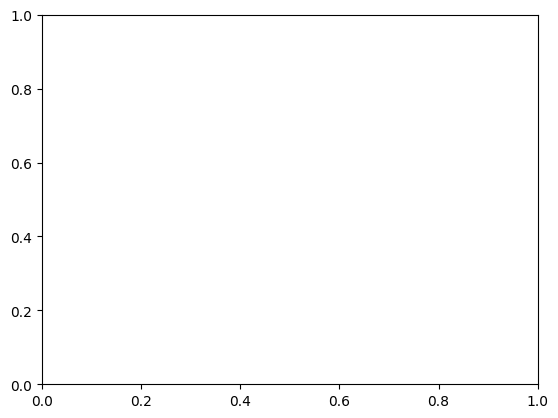

In [113]:
width = 0.6  # the width of the bars: can also be len(x) sequence

graph_data = szn_avgs.sort_values('avg_rating',ascending=False).head(10)

fig, ax = plt.subplots()

graph_data['NameSzn'] = graph_data['player_name'].astype(str) + ' (' + graph_data['league_season'].astype(str) + ')'  
# Convert the league season to strings properly
bar_container = ax.bar(graph_data['NameSzn'], graph_data['rating'].round(2),color='darkgreen')

plt.xticks([])
ax.set_xticklabels([])
ax.set_yticklabels(labels = list(range(0,11)),fontproperties=font_props)
ax.set_title('Best Seasons by Timbers Players',fontproperties=font_props,fontsize = 16)
ax.set_xlabel('Player & Season',fontproperties=font_props,fontsize=14)
ax.set_ylabel('Rating (0-10)',fontproperties=font_props,fontsize=14)
ax.set_ylim(0,10)

# Add x-axis labels inside the bars
for bar, label in zip(bar_container, graph_data['NameSzn']):
    ax.text(
        bar.get_x() + bar.get_width()/2,  # X position (center of bar)
        bar.get_height()/2,  # Y position (middle of bar)
        label,  # Text (category label)
        ha='center', va='center', fontsize=12, color='white', fontweight='bold',
        rotation=90
    )


# add color for mvp
bar_container[3].set_color('darkgoldenrod')

# Add bar labels
ax.bar_label(bar_container,fontproperties=font_props)

# Show plot
plt.show()

In [78]:
szn_avgs[szn_avgs['player_name'] == 'Diego Valeri'][['league_season','goals_total']]

,league_season,goals_total
6,2015,0.115385
33,2016,0.466667
60,2017,0.656250
85,2018,0.378378
115,2019,0.250000
144,2020,0.346154
173,2021,0.057143
